<a href="https://colab.research.google.com/github/Festuskipkoech/Festus_data-science/blob/main/PredictingHousingRent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_excel('/content/Boston_Housing.xlsx')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
data.shape

(506, 14)

##The modeling problem of our exercise is: given the attributes of a location, try to predict the median housing price of this location.

###We store the target variable and predictors using 2 separate objects, x and y, following math and ML notations.

In [ ]:
# split predictors and targets that is the features and labels
y=data['MEDV']
X=data.drop(columns=['MEDV'])



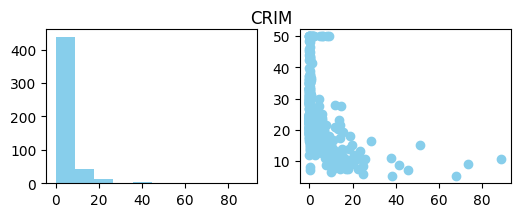

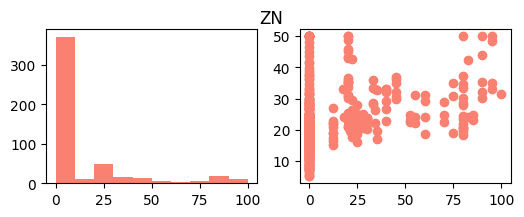

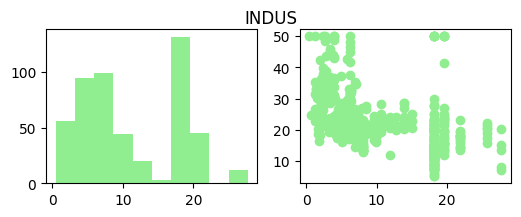

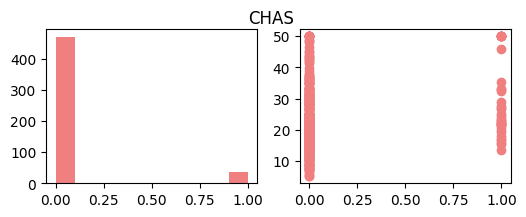

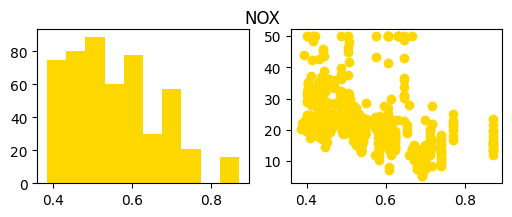

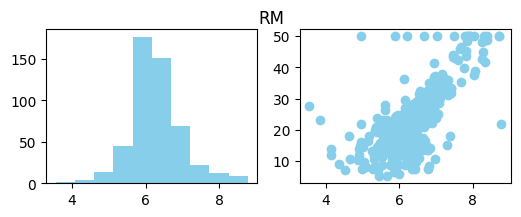

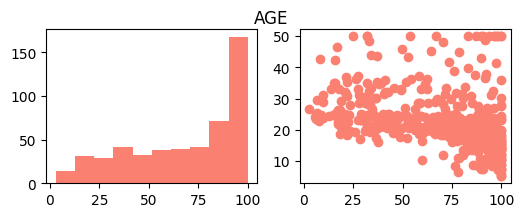

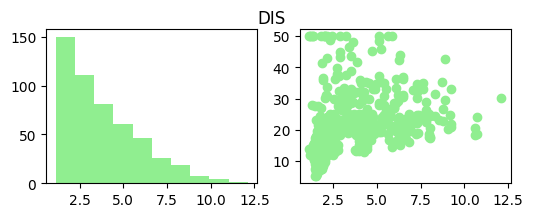

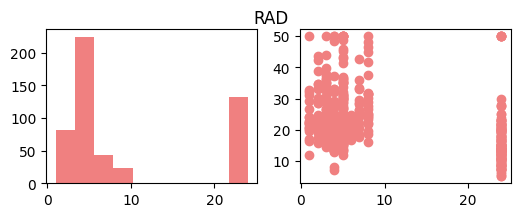

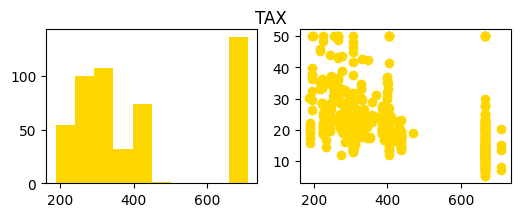

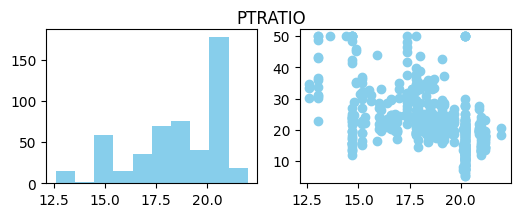

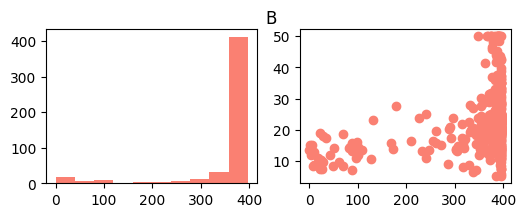

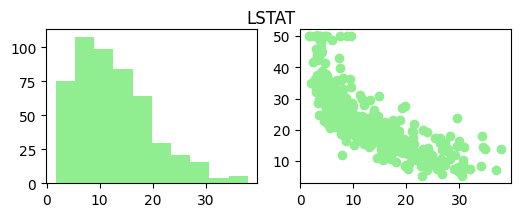

In [ ]:
# Distribution of predictors and realtionship with target
# for col in X.columns:
#   fig, ax = plt.subplots(1,2, figsize=(6,2))
#   ax[0].hist(X[col])
#   ax[1].scatter(X[col], y)
#   fig.suptitle(col)
#   plt.show()

colors = ['skyblue', 'salmon', 'lightgreen', 'lightcoral', 'gold']  # Define a list of colors

for i, col in enumerate(X.columns):
    fig, ax = plt.subplots(1, 2, figsize=(6, 2))
    color = colors[i % len(colors)]  # Cycle through colors if there are more columns than colors
    ax[0].hist(X[col], color=color)
    ax[1].scatter(X[col], y, color=color)
    fig.suptitle(col)
    plt.show()


### Cost Computation

How well the model captures the relationship between the **predictors** and the **target** can be measured by how much the predicted results deviate from the ground truth. The function that quantifies this deviation is called the **Cost Function**.

The smaller the cost is, the better the model captures the relationship between the predictors and the target. Mathematically, the model training process aims to **minimize the result of the cost function**.

There are different cost functions that can be used for regression problems, including:
- **Sum of Squared Errors (SSE)**
- **Mean Squared Error (MSE)**
- **Mean Absolute Error (MAE)**

#### Mean Squared Error (MSE)

MSE is the most popular cost function used for Linear Regression and is the default cost function in many statistical packages in R and Python. The mathematical expression for MSE is:

\[
\text{MSE} = \frac{1}{2n} \sum_{i=1}^{n} (\hat{y_i} - y_i)^2
\]

> **Note:** The `2` in the denominator is there to make calculation simpler for derivatives in optimization.

To use MSE as our cost function in Python, we can define the following function:

```python
def mean_squared_error(y_true, y_pred):
    return np.mean((y_pred - y_true) ** 2) / 2


In [ ]:
def compute_cost(X, y, w, b):
    # m: number of data points (rows in the input matrix X)
    m = X.shape[0]

    # f_wb: predicted values using the linear model equation (X * w + b)
    # np.dot(X, w) calculates the dot product between the feature matrix X and the weights w
    # Adding the bias term b to each prediction
    f_wb = np.dot(X, w) + b

    # cost: sum of squared errors between the predicted values (f_wb) and the true target values (y)
    # np.power(f_wb - y, 2) squares the differences between predictions and actual values
    # np.sum() adds up all the squared errors
    cost = np.sum(np.power(f_wb - y, 2))

    # total_cost: mean squared error (MSE)
    # 1/(2 * m) is the scaling factor for normalization
    # Dividing by m gives the average cost per data point, and the 1/2 simplifies the derivative in gradient descent
    total_cost = 1/(2 * m) * cost

    # Return the computed total cost (mean squared error)
    return total_cost


### Gradient Descent

**Gradient** — the slope of the tangent line at a certain point of the function.  
In multivariable calculus, the gradient is a vector that points in the direction of the steepest ascent at a certain point.

**Descent** — moving towards the minimum of the cost function.

**Gradient Descent** — a method that iteratively adjusts the parameters in small steps, guided by the gradient, to reach the lowest point of a function.  
It is a way to numerically reach the desired parameters for **Linear Regression**.


In [ ]:
def compute_gradient(X,y, w,b):
  m, n=X.shape
  dj_dw=np.zeros((n,))
  dj_db=0.

  err=(np.dot(X,w) + b) -y
  dj_dw=np.dot(X.T, err)  # dimension: (n,m)*(m,1)=(n,1)
  dj_db=np.sum(err)

  dj_dw=dj_dw / m
  dj_db=dj_db /m

  return dj_db, dj_dw
# Using this function, we get the gradients of the cost function, and with a set learning rate, update the parameters iteratively.

# Since it’s a loop logically, we need to define the stopping condition, which could be any of:

# We reach the set number of iterations
# The cost gets to below a certain threshold
# The improvement drops below a certain threshold

In [ ]:
# If we choose the number of iterations as the stopping condition, we can write the Gradient Descent process to be:
def gradient_descent(X, y, w_in,b_in, cost_function,gradient_function, alpha,num_iters):
  J_history=[]
  w = copy.deepcopy(w_in)
  b=b_in

  for i in range(num_iters):
    dj_db, dj_dw=gradient_function(X, y, b, w)
    w=w-alpha*dj_dw
    b=b-alpha*dj_db

    cost=cost_function(X,y,w,b)
    J_history.append(cost)

    if i% math.ceil(num_iters /10) ==10:
      print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")

  return w,b,J_history



In [ ]:
# Apply it to our dataset
iterations=1000
alpha=5.0e-6

w_out, b_out, J_hist=gradient_descent(X_train, y_train,b_init, w_init,compute_cost,compute_gradient,alpha,iterations)


In [ ]:
# We can visualize the process of cost decreases as the number iteration increases using the below function:
def plot_cost_history(data, cost_type):
  plt.figure(figsize=(4,2))
  plt.plot(data)
  plt.Xlabel("Iteration Step")
  plt.ylabel(cost_type)
  plt.title("Cost Vs. Iteration")
  plt.show()




##Prediction
###Making predictions is essentially applying the model to our dataset of interest to get the output values. These values are what the model “thinks” the target value should be, given a set of predictor values.

In [ ]:
# In our case we apply the linear function
def predict(X, w, b):
  p=np.dot(X, w) + b
  return p

# Get prediction results using:
y_pred=predict(X_test, w_out, b_out)


##Result Evaluation
###How do we get an idea of the model performance?

###One way is through the cost function, as stated earlier:

In [ ]:
def compute_mse(y1, y2):
  return np.mean(np.power((y1-y2), 2))
mse=compute_mse(y_test, y_pred)
print(mse)